# Aerofit Treadmill 

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

## Business Problem

1.The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

2.Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

### Accessing the modules

In [108]:
# import required modules for the analysis.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Dataset

To Load the Dataset, we have to use the Pandas function  **pd.read_csv()**  and  **head()**  will the show the dataset (First Five records).

In [109]:
aerofit = pd.read_csv("aerofit_treadmill.csv")
aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


### Reference

For the reference we will add the Selling Price column for the corresponding Products.

In [110]:
def map_the_price(product):
    
    if product == "KP281":
        return 1500
    elif product == "KP781":
        return 2500
    else:
        return 1750

In [111]:
aerofit["Selling_Price"] = aerofit["Product"].apply(map_the_price)
aerofit

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Selling_Price
0,KP281,18,Male,14,Single,3,4,29562,112,1500
1,KP281,19,Male,15,Single,2,3,31836,75,1500
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500
3,KP281,19,Male,12,Single,3,3,32973,85,1500
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,2500
176,KP781,42,Male,18,Single,5,4,89641,200,2500
177,KP781,45,Male,16,Single,5,5,90886,160,2500
178,KP781,47,Male,18,Partnered,4,5,104581,120,2500


### Better Understanding

For the better understanding of Fitness and Usage we convert it to the categorical colums as C_Fitness and C_Usage. 

**Scale :-**

**Fitness :**

1.1 and 2 - Low

2.3 and 4 - Average

3.5 - High


**Usage :**

1.2 and 3 - Low

2.4 and 5 - Average

3.6 and 7 - High

In [112]:
def map_to_F_category(value):
    if value <= 2:
        return 'Low'
    elif value <= 4:
        return 'Average'
    else:
        return 'High'
    
aerofit["C_Fitness"] = aerofit["Fitness"].apply(map_to_F_category)
aerofit

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Selling_Price,C_Fitness
0,KP281,18,Male,14,Single,3,4,29562,112,1500,Average
1,KP281,19,Male,15,Single,2,3,31836,75,1500,Average
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500,Average
3,KP281,19,Male,12,Single,3,3,32973,85,1500,Average
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500,Low
...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,2500,High
176,KP781,42,Male,18,Single,5,4,89641,200,2500,Average
177,KP781,45,Male,16,Single,5,5,90886,160,2500,High
178,KP781,47,Male,18,Partnered,4,5,104581,120,2500,High


In [113]:
def map_to_U_category(value):
    if value <= 3:
        return 'Low'
    elif value <= 5:
        return 'Average'
    else:
        return 'High'
    
aerofit["C_Usage"] = aerofit["Usage"].apply(map_to_U_category)
aerofit

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Selling_Price,C_Fitness,C_Usage
0,KP281,18,Male,14,Single,3,4,29562,112,1500,Average,Low
1,KP281,19,Male,15,Single,2,3,31836,75,1500,Average,Low
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500,Average,Average
3,KP281,19,Male,12,Single,3,3,32973,85,1500,Average,Low
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500,Low,Average
...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,2500,High,High
176,KP781,42,Male,18,Single,5,4,89641,200,2500,Average,Average
177,KP781,45,Male,16,Single,5,5,90886,160,2500,High,Average
178,KP781,47,Male,18,Partnered,4,5,104581,120,2500,High,Average


### Analyzing Each Column


Product Purchased : KP281, KP481, or KP781

Age               : In years

Gender            : Male/Female

Education         : In years

MaritalStatus     : Single or partnered

Usage             : The average number of times the customer plans to use the treadmill each week

Income            : Annual income (in $)

Fitness           : Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape

Miles             : The average number of miles the customer expects to walk/run each week

selling_price     : Selling Price for the Products

C_Usage           : Categorical representation of usage. 2 and 3 - Low ,4 and 5 - Average ,6 and 7 - High

C_Fitness         :Categorical representation of Fitness. 1 and 2 - Low ,3 and 4 - Average ,5 - High

### Shape 

In [114]:
aerofit.shape

(180, 12)

**Shape of the data :** 180 rows and 12 columns

### Information about the Columns

In [115]:
aerofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
 9   Selling_Price  180 non-null    int64 
 10  C_Fitness      180 non-null    object
 11  C_Usage        180 non-null    object
dtypes: int64(7), object(5)
memory usage: 17.0+ KB


### Performing Type conversion

Ensuring the data types are appropriately adjusted facilitates smoother data analysis.

Gender and MaritalStatus - Covert this to **category**.


In [116]:
aerofit["Gender"] = aerofit["Gender"].astype("category")
aerofit["MaritalStatus"] = aerofit["MaritalStatus"].astype("category")

In [117]:
aerofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    object  
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
 9   Selling_Price  180 non-null    int64   
 10  C_Fitness      180 non-null    object  
 11  C_Usage        180 non-null    object  
dtypes: category(2), int64(7), object(3)
memory usage: 14.8+ KB


### Check for Missing or Null Values

In [118]:
aerofit.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
Selling_Price    0
C_Fitness        0
C_Usage          0
dtype: int64

**Missing or Null Values :** There is no missing or Null values in the Dataset. 

### Check For Duplicates

In [119]:
aerofit.duplicated().any()

False

**Duplicates :** There is no duplicates in this Dataset.

### Value Analysis

#### Product

In [120]:
aerofit["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

#### Age

In [121]:
aerofit["Age"].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42],
      dtype=int64)

#### Gender

In [122]:
aerofit["Gender"].unique()

['Male', 'Female']
Categories (2, object): ['Female', 'Male']

#### Education

In [123]:
aerofit["Education"].unique()

array([14, 15, 12, 13, 16, 18, 20, 21], dtype=int64)

#### Marital Status

In [124]:
aerofit["MaritalStatus"].unique()

['Single', 'Partnered']
Categories (2, object): ['Partnered', 'Single']

#### Usage

In [125]:
aerofit["Usage"].unique()

array([3, 2, 4, 5, 6, 7], dtype=int64)

#### Fitness

In [126]:
aerofit["Fitness"].unique()

array([4, 3, 2, 1, 5], dtype=int64)

#### Income

In [127]:
aerofit["Income"].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508], dtype=int64)

#### Miles

In [128]:
aerofit["Miles"].unique()

array([112,  75,  66,  85,  47, 141, 103,  94, 113,  38, 188,  56, 132,
       169,  64,  53, 106,  95, 212,  42, 127,  74, 170,  21, 120, 200,
       140, 100,  80, 160, 180, 240, 150, 300, 280, 260, 360], dtype=int64)

#### Selling Price

In [129]:
aerofit["Selling_Price"].unique()

array([1500, 1750, 2500], dtype=int64)

#### C_Fitness

In [130]:
aerofit["C_Fitness"].unique()

array(['Average', 'Low', 'High'], dtype=object)

#### C_Usage

In [131]:
aerofit["C_Usage"].unique()

array(['Low', 'Average', 'High'], dtype=object)

### Numerical Description

In [132]:
aerofit.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0
Selling_Price,180.0,1805.555556,387.978895,1500.0,1500.00,1750.0,1750.00,2500.0


**Insights :**

1.There are no missing values in the data.

2.There are 3 unique products in the dataset.

3.KP281 is the most frequent product.

4.Minimum & Maximum age of the person is 18 & 50, mean is 28.79 and 75% of persons have age less than or equal to 33.

5.Most of the people are having 16 years of education i.e., 75% of persons are having education <= 16 years.

6.Out of 180 data points, 104's gender is Male and rest are the female.

7.Standard deviation for Income & Miles is very high. These variables might have the outliers in it.

### Categorical Description

# univariate Analysis

#### Product

In [134]:
aerofit["Product"].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

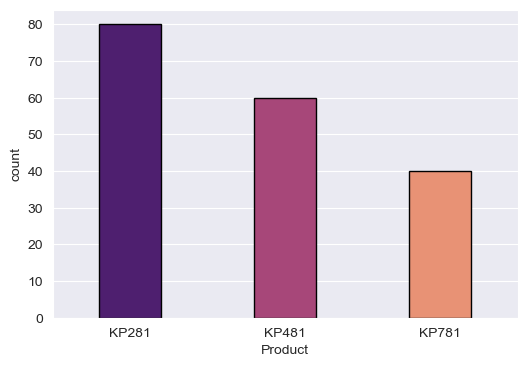

In [135]:
sns.set_style("darkgrid")

plt.figure(figsize = (6,4))
sns.countplot(data = aerofit,x = "Product",width = 0.4,palette = "magma",ec = "k")
plt.show()

**Insights :**

There are more number of products in KP281 when compared to the other products KP481 and KP781.

#### Age

In [136]:
aerofit["Age"].value_counts()
s = pd.cut(x = aerofit["Age"],bins =[15,20,25,30,35,40,45,50] )
s.value_counts()


(20, 25]    69
(25, 30]    41
(30, 35]    32
(35, 40]    16
(15, 20]    10
(40, 45]     6
(45, 50]     6
Name: Age, dtype: int64

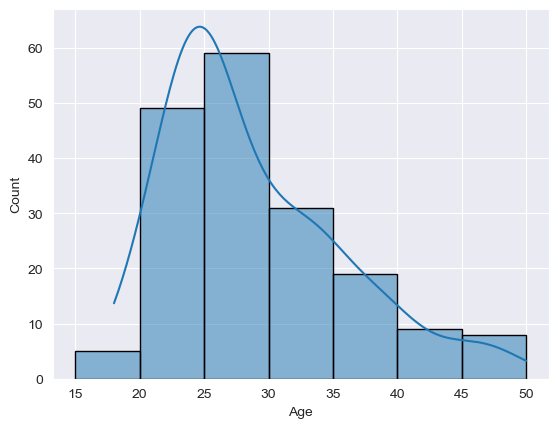

In [137]:
bins = [15,20,25,30,35,40,45,50]
sns.histplot(data = aerofit,x = "Age",kde = True,bins =  bins,stat = "count",ec = "k")
plt.show()

**Insights :**

Among these different ranges in Age, 20-25 age are the hightest in distribution. 

#### Gender

In [138]:
aerofit["Gender"].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

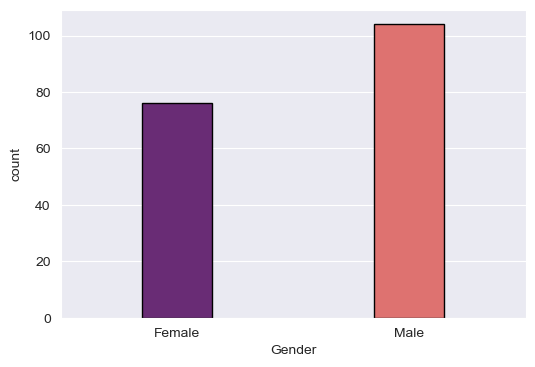

In [139]:
plt.figure(figsize = (6,4))
sns.countplot(data = aerofit,x = "Gender",palette = "magma",ec = "k" ,width = 0.3)
plt.show()

**Insights :**

Male are more in this, compared to Female.

#### Selling Price

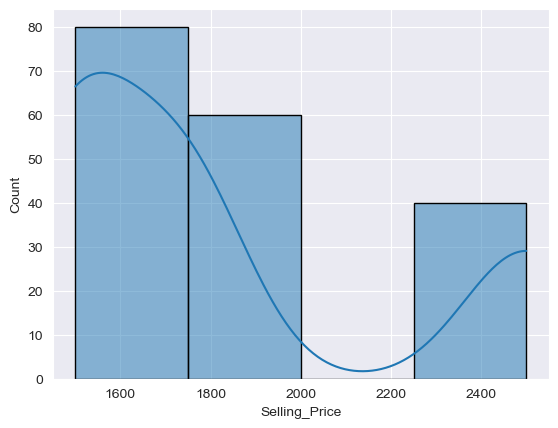

In [140]:
sns.histplot(data = aerofit,x = "Selling_Price",bins = 4,kde = True,ec = "k")
plt.show()

#### Education

In [141]:
aerofit["Education"].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

<Figure size 600x400 with 0 Axes>

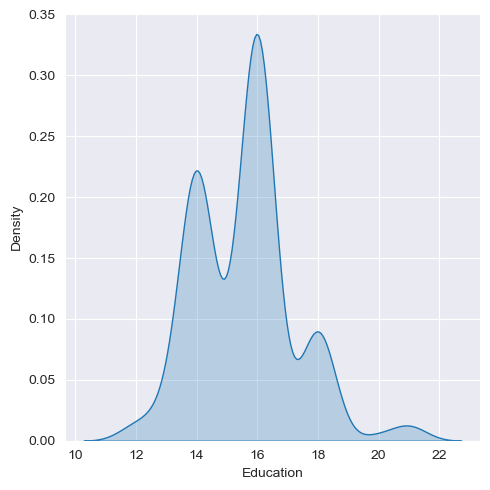

In [142]:
plt.figure(figsize = (6,4))
sns.displot(data = aerofit, x = "Education",kind = "kde",fill = True)
plt.show()

#### MaritalStatus

In [143]:
aerofit["MaritalStatus"].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

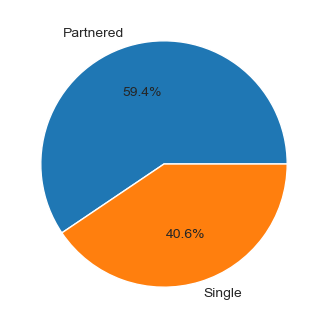

In [144]:
plt.figure(figsize = (6,4))
plt.pie(data = aerofit,x = aerofit["MaritalStatus"].value_counts(),autopct = "%.1f%%",labels = ["Partnered","Single"])
plt.show()

**Insights:**

Partnered are 59.4% and Single are 40.6% in the Distribution.Among these Partnered are the highest one.

#### Income

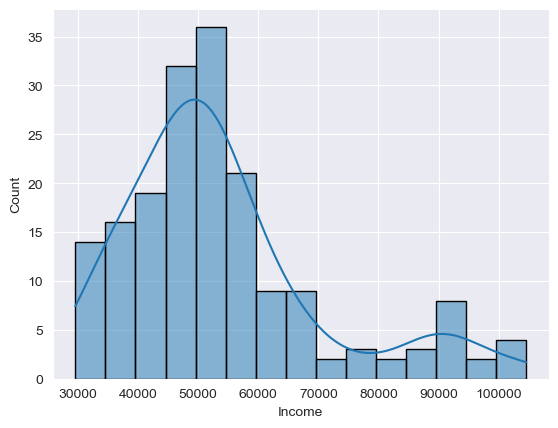

In [145]:
sns.histplot(data = aerofit,x = "Income",kde = True,ec = "k")
plt.show()

#### Miles

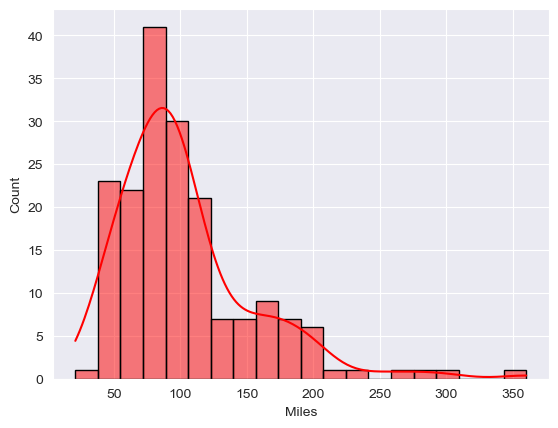

In [146]:
sns.histplot(data = aerofit,x = "Miles",kde = True,color = "r",ec = "k")
plt.show()

#### C_Fitness

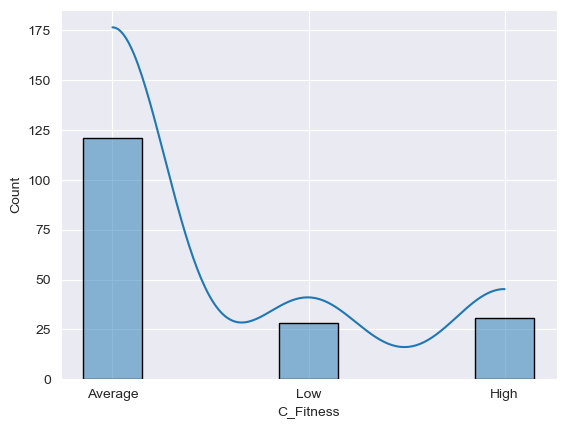

In [147]:
sns.histplot(data = aerofit,x = "C_Fitness",kde = True,shrink = 0.3,ec = "k")
plt.show()

**Insights :**

In this Fitness category most of them having Average Fitness and followed by High Fitness.

#### C_Usage

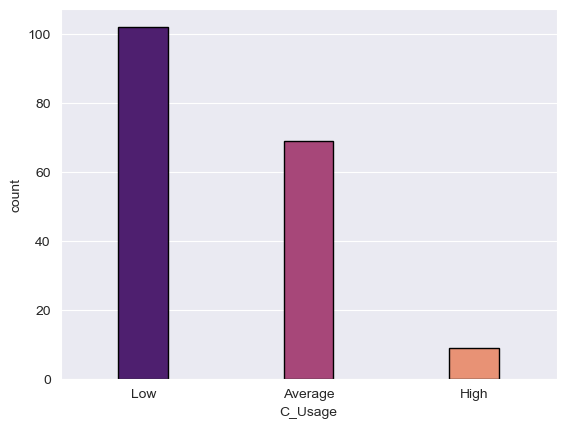

In [148]:
sns.countplot(data = aerofit,x = "C_Usage",order = aerofit["C_Usage"].value_counts().index,ec = "k",width = 0.3,palette = "magma")
plt.show()

**Insights :**

In this Usage category, most of them having the usage value as Low and followed by Average and High usage.

### Outliers Analysis or Detection:- 

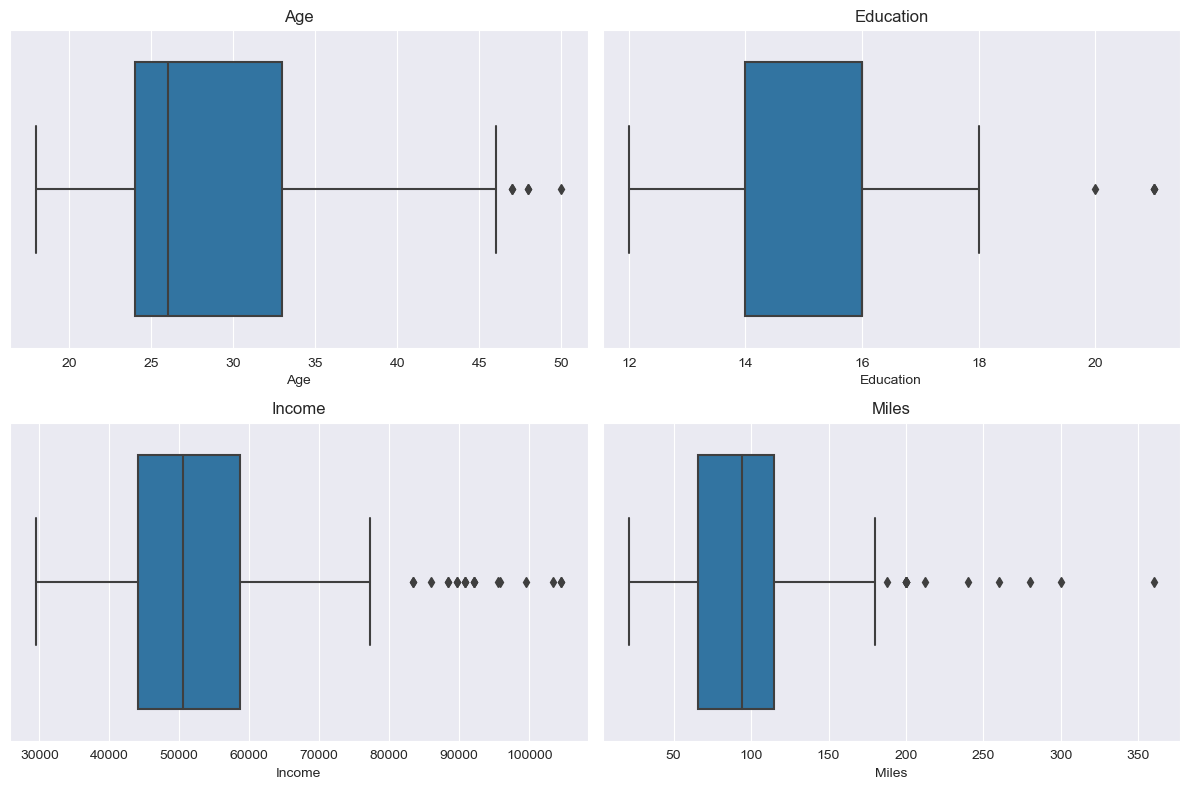

In [149]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(data=aerofit, x="Age", ax=axs[0, 0])
axs[0, 0].set_title('Age')

sns.boxplot(data=aerofit, x="Education", ax=axs[0, 1])
axs[0, 1].set_title('Education')

sns.boxplot(data=aerofit, x="Income", ax=axs[1, 0])
axs[1, 0].set_title('Income')

sns.boxplot(data=aerofit, x="Miles", ax=axs[1, 1])
axs[1, 1].set_title('Miles')

plt.tight_layout()
plt.show()

**Insights :**

1.Age and Education having Fewer Outliers. 

2.Income and Miles having more number of Outliers.

# Bi - Variate Analysis

In [150]:
aerofit

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Selling_Price,C_Fitness,C_Usage
0,KP281,18,Male,14,Single,3,4,29562,112,1500,Average,Low
1,KP281,19,Male,15,Single,2,3,31836,75,1500,Average,Low
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500,Average,Average
3,KP281,19,Male,12,Single,3,3,32973,85,1500,Average,Low
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500,Low,Average
...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,2500,High,High
176,KP781,42,Male,18,Single,5,4,89641,200,2500,Average,Average
177,KP781,45,Male,16,Single,5,5,90886,160,2500,High,Average
178,KP781,47,Male,18,Partnered,4,5,104581,120,2500,High,Average


In [ ]:
male_prob = aerofit[aerofit["Gender"] == "Male"]

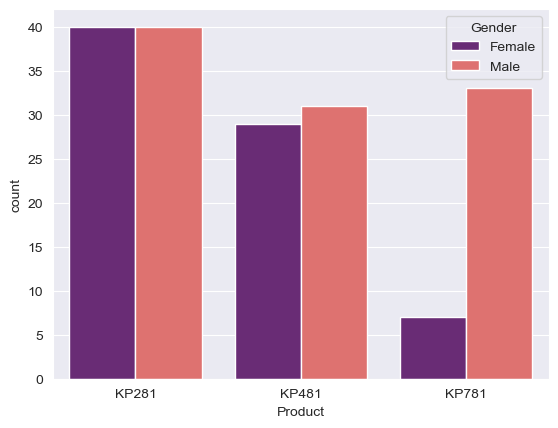

In [151]:
sns.countplot(data = aerofit,x = "Product",hue = "Gender",palette = "magma")
plt.show()

**Insights :**
    
1. There are Equal number of male and female customers in the product KP281.

2. Almost equal number of male and female customers are in product KP481.

3. Lower number of female customers are in the product KP781 when compared to male.

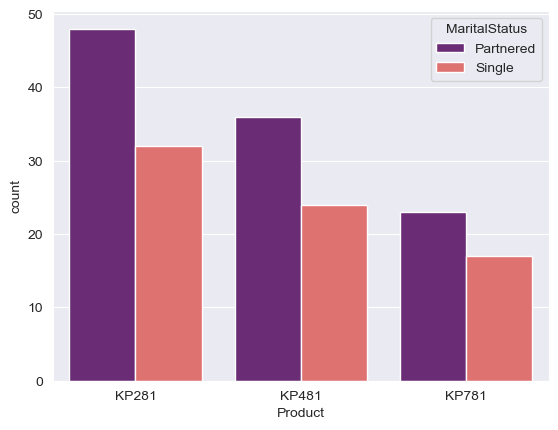

In [152]:
sns.countplot(data = aerofit,x = "Product",hue = "MaritalStatus",palette = "magma")
plt.show()

**Insights :**

Partnered Customers are more in number in all the Three products compared to single.

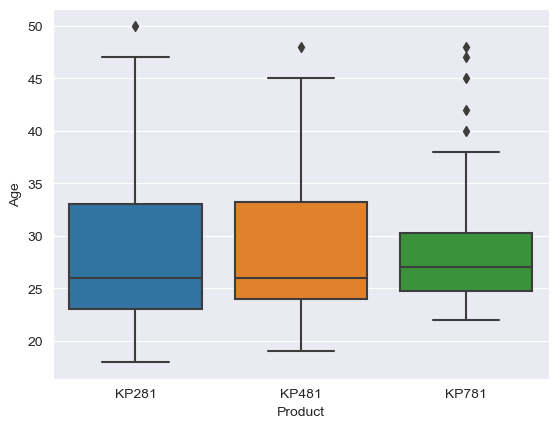

In [153]:
sns.boxplot(data = aerofit,x = "Product",y = "Age")
plt.show()

**Insights :**

1. Almost Same mean values in all the ages in all the products.

2. When compared to the product KP281 and KP481, KP781 have more number of Outliers.

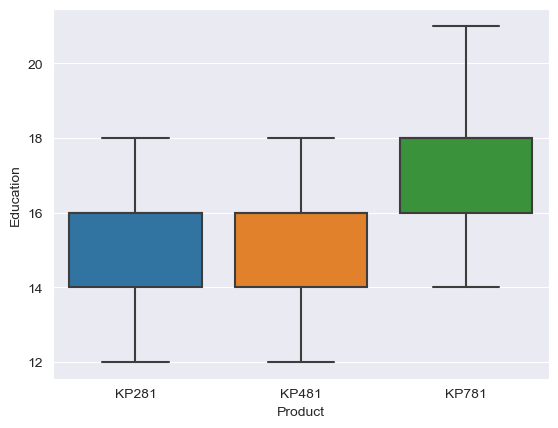

In [154]:
sns.boxplot(data = aerofit,x = "Product",y = "Education")
plt.show()

**Insights :**

1. Same distribution in education for product KP281 and KP481.
2. Product KP781 are the hightest in distribution.

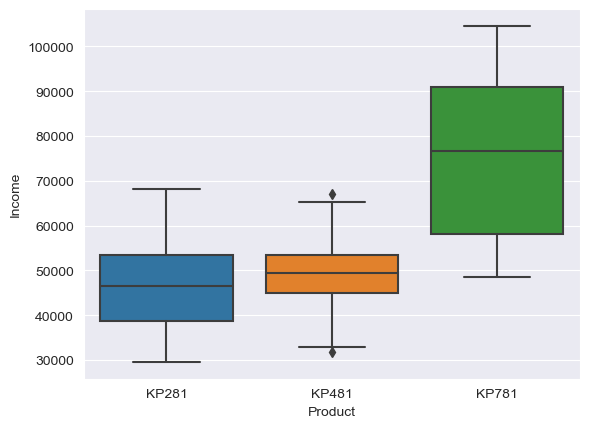

In [155]:
sns.boxplot(data = aerofit,x = "Product",y = "Income")
plt.show()

**Insights :**
    
1. The Average Income for the KP281 and KP481 product is almost similar.

2. The Highest in number is KP781 customers having more incomes. 

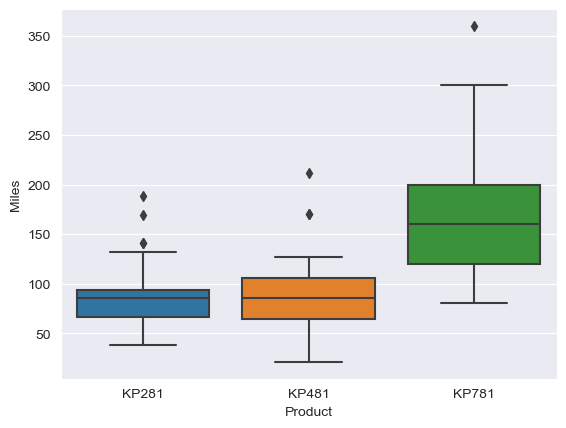

In [156]:
sns.boxplot(data = aerofit,x = "Product",y = "Miles")
plt.show()

**Insights :**
    
1. The Average Miles for the KP281 and KP481 product is almost similar.

2. The Highest in number is KP781 customers having more Miles. 

3. KP281 having more outliers followed by KP481 and KP781.

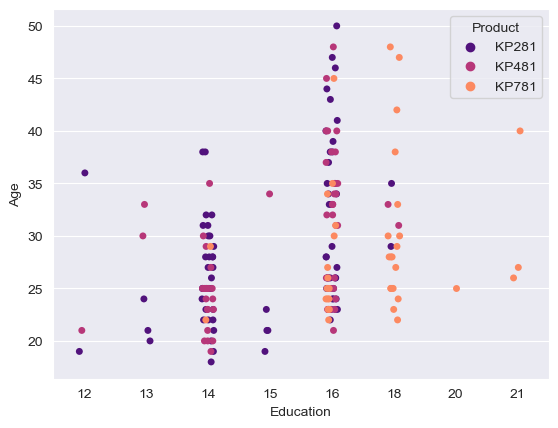

In [157]:
sns.stripplot(data = aerofit,y = "Age",x = "Education",hue = "Product",palette = "magma")
plt.show()

**Insights :**

More number of Age customers are in the Education 16 and then 18 and 14.

In [158]:
aerofit_income_status_relation = aerofit.groupby("MaritalStatus")["Income"].mean()
aerofit_income_status_relation

MaritalStatus
Partnered    55763.000000
Single       50724.424658
Name: Income, dtype: float64

**Insights :**
    
1. Partnered Customers having the higher income average.

2. Single Customers having the higher income average.

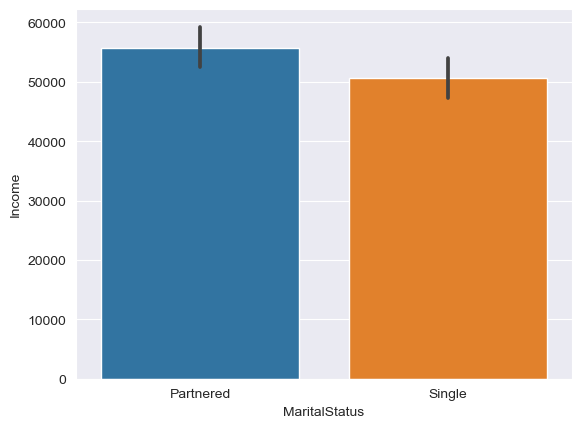

In [159]:
sns.barplot(data = aerofit, x = "MaritalStatus",y = "Income",estimator = "mean")
plt.show()

**Insights :**

The Average income for the partnered customers are higher when compared to the single.

In [160]:
aerofit_income_age_relation = aerofit.groupby("Age")["Income"].mean().to_frame().round(2).reset_index()
aerofit_income_age_relation.sort_values(by = "Income",ascending = False,inplace = True)
aerofit_income_age_relation.head()

,Age,Income
24,42,89641.00
29,47,80715.50
30,48,76747.50
27,45,72731.00
12,30,71374.29


In [161]:
aerofit_income_age_relation.tail()

,Age,Income
4,22,42179.57
2,20,34792.20
3,21,34597.29
1,19,31836.00
0,18,29562.00


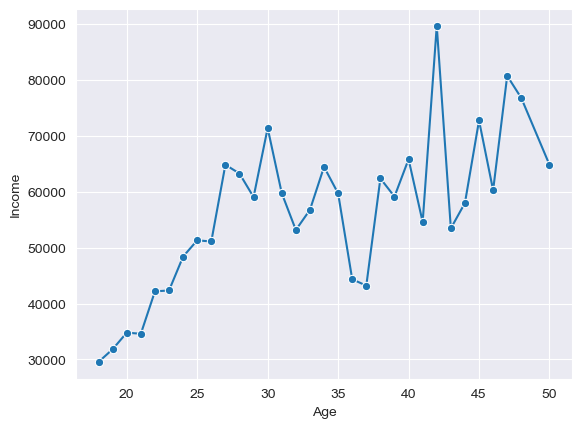

In [162]:
sns.lineplot(data = aerofit_income_age_relation,x = "Age",y = "Income",marker = "o")
plt.show()

**Insights :**

1. Age Group 42 having the higher income average and followed by 47.
2. Age Group 18 having the lower income average.

In [163]:
aerofit_miles_age_relation = aerofit.groupby("Age")["Miles"].mean().to_frame().round(2).reset_index()
aerofit_miles_age_relation.sort_values(by = "Miles",ascending = False,inplace = True)
aerofit_miles_age_relation.head()

,Age,Miles
24,42,200.00
12,30,142.29
21,39,132.00
11,29,132.00
30,48,122.00


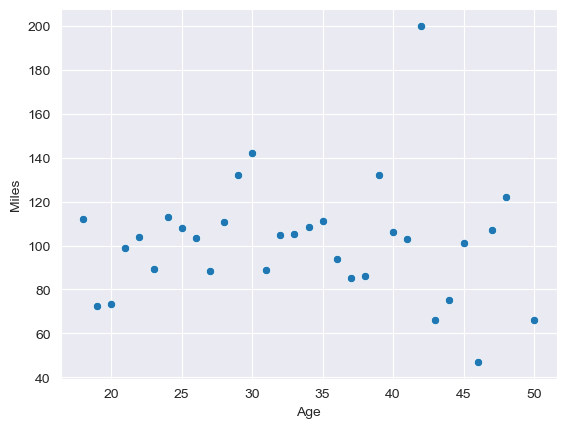

In [164]:
sns.scatterplot(data = aerofit_miles_age_relation,x = "Age",y = "Miles")
plt.show()

**Insights :**

1.Age 42 having the higher miles average.

2.This might be the Outlier.

<Axes: xlabel='Age', ylabel='C_Usage'>

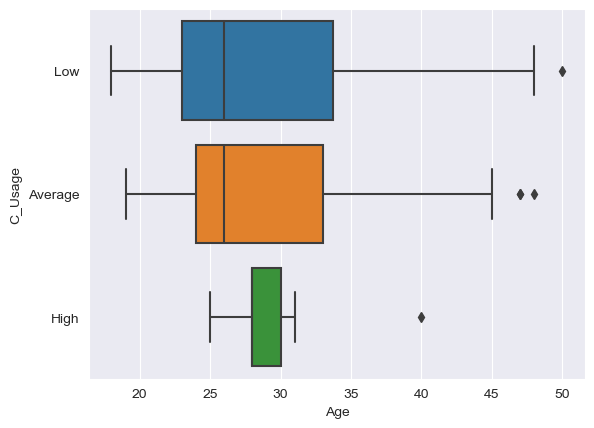

In [165]:
sns.boxplot(data = aerofit,x = "Age",y = "C_Usage")

### Multivariate Analysis :- 

In [166]:
corr = aerofit.corr(numeric_only  = True)
corr

,Age,Education,Usage,Fitness,Income,Miles,Selling_Price
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618,0.029263
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284,0.563463
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130,0.623124
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702,0.696616
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473,0.695847
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000,0.643923
Selling_Price,0.029263,0.563463,0.623124,0.696616,0.695847,0.643923,1.000000


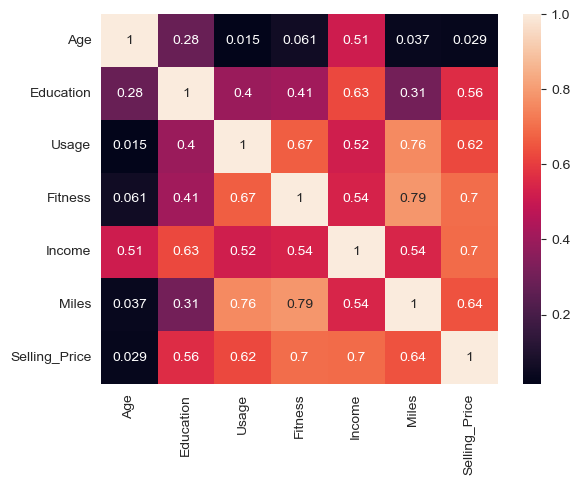

In [167]:
sns.heatmap(data = corr,annot = True)
plt.show()

**Insight :**

There is no strong correlation between these features.

### Marginal Probability

In [184]:
cross_tab = pd.crosstab(index=aerofit['Product'], columns='count')
marginal_prob = cross_tab / cross_tab.sum() * 100
marginal_probs = pd.DataFrame(marginal_prob).reset_index()
marginal_probs.rename(columns = {"count":"Probability %"},inplace = True)
marginal_probs

col_0,Product,Probability %
0,KP281,44.444444
1,KP481,33.333333
2,KP781,22.222222


**Insights :**
    
The Marginal Probability for the Product KP281 has the Highest when compared to the products KP481 and KP781.

### Conditional and Marginal Probabilities :-

In [198]:
cross_tab = pd.crosstab(index=aerofit['Gender'], columns=aerofit['Product'])
conditional_prob = cross_tab.div(cross_tab.sum(axis=1), axis=0)*100
marginal_gender = cross_tab.div(cross_tab.sum().sum())*100
marginal_product = cross_tab.div(cross_tab.sum(axis=1), axis=0).sum()*100

# Display the results
print("Conditional Probability:")
print(conditional_prob)
print("\nMarginal Probability for Gender:")
print(marginal_gender)
print("\nMarginal Probability for Product:")
print(marginal_product)

Conditional Probability:
Product      KP281      KP481      KP781
Gender                                  
Female   52.631579  38.157895   9.210526
Male     38.461538  29.807692  31.730769

Marginal Probability for Gender:
Product      KP281      KP481      KP781
Gender                                  
Female   22.222222  16.111111   3.888889
Male     22.222222  17.222222  18.333333

Marginal Probability for Product:
Product
KP281    91.093117
KP481    67.965587
KP781    40.941296
dtype: float64


# Actionable Sights :-

1.Product KP281 has the highest selling point compared to KP781 because KP781 is only affordable for high-income customers. However, by elaborating on the benefits and features of KP781, we can potentially convert some low and middle-income customers into buyers.

2.Male customers outnumber female customers. We can organize a campaign specifically targeting females to provide more information about fitness and exercise, aiming to increase their participation of buying more products.

3.Partnered are higher in percentage of buying products when compared to singles.To increase their sales,we can give Offer special promotions, discounts, or loyalty rewards tailored specifically to single customers. This not only incentivizes purchases but also makes them feel appreciated and valued by your brand.

4.The Usage of these products were very low.To increase their usage by giving Offer product demonstrations or free trials for consumers to experience the product firsthand, boosting confidence and encouraging usage. Gather feedback from current users to identify barriers or areas for improvement, enhancing usability and relevance through continuous product development.

5.More of them having average Fitness.Provide ongoing support and guidance to help individuals stay committed to their fitness goals. This could include regular check-ins, progress tracking, and access to expert advice or coaching to address any challenges or setbacks along the way.

6.For Age Group 42 and 47 having Higher Income Average and 18 having lower income.To increase the sales of age group 18 by providing flexible payment plans or installment options to make purchases more manageable for individuals with limited disposable income. This can help overcome financial barriers and encourage them to make a purchase without straining their finances.